<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Features_Selections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/Untitled folder/Tinnitus_ALR&EEG_2022.08.26_final.csv")
classes = np.array(sorted(list(set(dataset.iloc[:, 1]))))

In [3]:
dataset.head()

,Subjects,SubjectTypeClass,TestType,n0_gap_peak_ms_20ms,p1_gap_peak_ms_20ms,n1_gap_peak_ms_20ms,p2_gap_peak_ms_20ms,n2_gap_peak_ms_20ms,p3_gap_peak_ms_20ms,n0_nogap_peak_ms_20ms,...,MeanP_Gamma_50ms,TotalEEGPower_50ms,RelativeAlpha_50ms,RelativeBeta_50ms,RelativeTheta_50ms,RelativeDelta_50ms,DTR_50ms,DTABR_50ms,ATR_50ms,ABR_50ms
0,'06_HSO_60_01',Control,Test,96,177,213,304,425,135,175,...,4.670000e-07,0.000055,0.0949,0.0372,0.387,0.481,1.240,6.57,0.245,2.55
1,'06_LSR_34_01',Control,Test,108,151,219,282,390,126,152,...,5.330000e-07,0.000047,0.1210,0.0500,0.419,0.410,0.979,4.83,0.290,2.43
2,'07_KHJ_33_02',Control,Test,123,195,246,275,456,99,166,...,2.890000e-05,0.000778,0.0805,0.0527,0.301,0.566,1.880,6.51,0.268,1.53
3,'08_LJS_26_01',Control,Test,98,163,212,320,416,134,197,...,5.990000e-07,0.000075,0.0885,0.0397,0.354,0.518,1.460,6.80,0.250,2.23
4,'09_JBH_58_01',Control,Test,127,166,206,271,386,119,153,...,8.390000e-07,0.000074,0.1090,0.0564,0.392,0.442,1.130,5.04,0.278,1.93


In [19]:
classes

array(['Control', 'Patient'], dtype='<U7')

In [4]:
dataset.shape

(165, 275)

In [5]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset.iloc[:, 1]=encoder.fit_transform(dataset.iloc[:, 1])

In [6]:
X_ = dataset.iloc[:,3:]
y_ = dataset.iloc[:, 1]


In [38]:
col=list(dataset.iloc[0:0,3:])

#Filter Method (Model Free)

<font color='red'> Warning: Run only one Type at a time</font>

**Type-1**

In [ ]:
from sklearn.feature_selection import SelectKBest
bestfeatures_1 = SelectKBest(k=10)
fit = bestfeatures_1.fit(X_,y_)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']


**Type-2**

In [ ]:
from sklearn.feature_selection import SelectKBest,f_classif
bestfeatures_2=SelectKBest(f_classif, k=10)
fit = bestfeatures_f2fit(X_,y_)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

**Type-3**

In [ ]:
from sklearn.feature_selection import SelectFpr, f_classif

bestfeatures_3=SelectFpr(f_classif, alpha=0.1)
fit = bestfeatures_3.fit(X_,y_)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

#f_regression()

In [41]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import pandas as pd

# generate dataset
X_, y_ = make_regression(n_samples=165, n_features=272, n_informative=10)
#assign column names 
col_list = [col[x] for x in range(0,272)]
#create a dataframe table
df = pd.DataFrame(X_, columns=col_list)

#feature selection using f_regression 
fs = SelectKBest(score_func=f_regression, k=5)
fit = fs.fit(X_,y_)

#create df for scores
dfscores = pd.DataFrame(fit.scores_)
#create df for column names
dfcolumns = pd.DataFrame(df.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#naming the dataframe columns
featureScores.columns = ['Selected_columns','Score_pearsons'] 

#print 10 best features
lyst = featureScores.nlargest(30,'Score_pearsons')

In [44]:
print(type(lyst))

<class 'pandas.core.frame.DataFrame'>


#ANOVA with f_classif()

In [40]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd

# generate dataset
X_, y_ = make_classification(n_samples=165, n_features=272, n_informative=10)
#assign column names 
col_list = [col[x] for x in range(0,272)]
#create a dataframe table
df = pd.DataFrame(X_, columns=col_list)

#feature selection using f_classif
fs = SelectKBest(score_func=f_classif, k=5)
fit = fs.fit(X_,y_)
#create df for scores
dfscores = pd.DataFrame(fit.scores_)
#create df for column names
dfcolumns = pd.DataFrame(df.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#naming the dataframe columns
featureScores.columns = ['Selected_columns','Score_ANOVA'] 
#print 10 best features

print(featureScores.nlargest(30,'Score_ANOVA')) 

                   Selected_columns  Score_ANOVA
176             gap_AUC_n0p1n1_50ms    36.989440
23           n1p3_interval_gap_20ms    24.180364
77              gap_AUC_p2n2_L_20ms    20.075593
184             gap_AUC_n2p3_R_50ms    19.949708
58               n2p3_gap_diff_20ms    12.336037
208  nogap_AUC_n1p2n2_by_total_50ms    11.598571
15           n0n2_interval_gap_20ms    11.346373
144        n1p3_interval_nogap_50ms     7.342854
127          n1p2_interval_gap_50ms     7.181230
87            nogap_AUC_p2n2_R_20ms     6.820990
109             p2_gap_peak_ms_50ms     6.478971
161              p1n1_gap_diff_50ms     5.478112
4               n2_gap_peak_ms_20ms     5.316229
245         SpectralEdge_Alpha_50ms     5.094340
235               RelativeBeta_20ms     5.051312
143        n1n2_interval_nogap_50ms     4.859356
68              gap_AUC_n0p1_L_20ms     4.581841
63             n2p3_nogap_diff_20ms     4.411941
152            n2_gap_peak_amp_50ms     4.344738
33         p1p2_inte

<font color='blue' size=6><b>Input</b></font>

In [ ]:
number_of_feat=int(input("Number Of Best Features: "))

Number Of Best Features: 20


In [ ]:
imp=featureScores.nlargest(number_of_feat,'Score')
print(imp)

                         Specs      Score
182    p3_gap_peak_50msmp_50ms  29.777286
178    p1_gap_peak_50msmp_50ms  28.943612
207     gap_50msuc_n1p2_R_50ms  28.830587
168   p1p2_interval_nogap_50ms  27.979853
173   n1p3_interval_nogap_50ms  25.788322
181    n2_gap_peak_50msmp_50ms  24.112113
165   n0n2_interval_nogap_50ms  21.890297
200   p2n2_gap_nogap_diff_50ms  18.730306
73      gap_20msuc_n1p2_L_20ms  18.182582
209     gap_50msuc_n1p2_L_50ms  17.552783
71      gap_20msuc_n1p2_R_20ms  17.456283
46     p3_gap_peak_20msmp_20ms  16.757489
204     gap_50msuc_p1n1_R_50ms  16.445111
45     n2_gap_peak_20msmp_20ms  15.906518
42     p1_gap_peak_20msmp_20ms  15.880902
1          n1_gap_peak_ms_20ms  15.558168
33    p1n2_interval_nogap_20ms  15.009325
175   p2p3_interval_nogap_50ms  14.595137
211     gap_50msuc_n1p2n2_50ms  14.096806
187  n2_nogap_peak_50msmp_50ms  13.753050


In [ ]:
list_of_feat=[]

for i in range(number_of_feat):
  list_of_feat.append(imp.iloc[:,0:1].values[i][0])

#Filter Method (Model Based)

<font color='blue' size=6><b>Input</b></font>

In [ ]:
number_of_feat=int(input("Number Of Best Features: "))

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=number_of_feat)
sfs.fit(X_, y_)
list_of_feat=[]
list_of_feat=list(sfs.get_feature_names_out(list(dataset.iloc[:0,4:])))

#Wrapper

<font color='blue' size=6><b>Input</b></font>

In [7]:
number_of_feat=int(input("Number Of Best Features: "))

Number Of Best Features: 20


**Using Regression**

In [11]:
!pip install joblib
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
list_of_feat=[]



sfs = SFS(LinearRegression(),
           k_features=number_of_feat,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)

sfs.fit(X_, y_)

df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()

list_of_feat=list(df_SFS_results.iloc[-1,-1])
df_SFS_results


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,feature_idx,cv_scores,avg_score,feature_names
1,"(153,)",[0.154464703288255],0.154465,"(p3_gap_peak_amp_50ms,)"
2,"(146, 153)",[0.2752088220869673],0.275209,"(p2p3_interval_nogap_50ms, p3_gap_peak_amp_50ms)"
3,"(146, 153, 239)",[0.32774880525687355],0.327749,"(p2p3_interval_nogap_50ms, p3_gap_peak_amp_50m..."
4,"(1, 146, 153, 239)",[0.35931491220681055],0.359315,"(p1_gap_peak_ms_20ms, p2p3_interval_nogap_50ms..."
5,"(1, 139, 146, 153, 239)",[0.38829739025846965],0.388297,"(p1_gap_peak_ms_20ms, p1p2_interval_nogap_50ms..."
6,"(1, 139, 146, 153, 239, 264)",[0.41052393827740696],0.410524,"(p1_gap_peak_ms_20ms, p1p2_interval_nogap_50ms..."
7,"(1, 139, 146, 153, 239, 261, 264)",[0.4408298858593468],0.44083,"(p1_gap_peak_ms_20ms, p1p2_interval_nogap_50ms..."
8,"(1, 85, 139, 146, 153, 239, 261, 264)",[0.45513906565025586],0.455139,"(p1_gap_peak_ms_20ms, nogap_AUC_p1n1p2_20ms, p..."
9,"(1, 50, 85, 139, 146, 153, 239, 261, 264)",[0.47019318196053883],0.470193,"(p1_gap_peak_ms_20ms, n1_nogap_peak_amp_20ms, ..."
10,"(1, 50, 63, 85, 139, 146, 153, 239, 261, 264)",[0.48158743075132926],0.481587,"(p1_gap_peak_ms_20ms, n1_nogap_peak_amp_20ms, ..."


**RandomForestRegressor**

In [12]:
!pip install joblib
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import pandas as pd
import numpy as np
list_of_feat=[]



sfs = SFS(RandomForestClassifier(),
           k_features=number_of_feat,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)

sfs.fit(X_, y_)

df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()

list_of_feat=list(df_SFS_results.iloc[-1,-1])
df_SFS_results


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,feature_idx,cv_scores,avg_score,feature_names
1,"(30,)",[1.0],1.0,"(n0n2_interval_nogap_20ms,)"
2,"(0, 30)",[1.0],1.0,"(n0_gap_peak_ms_20ms, n0n2_interval_nogap_20ms)"
3,"(0, 1, 30)",[1.0],1.0,"(n0_gap_peak_ms_20ms, p1_gap_peak_ms_20ms, n0n..."
4,"(0, 1, 2, 30)",[1.0],1.0,"(n0_gap_peak_ms_20ms, p1_gap_peak_ms_20ms, n1_..."
5,"(0, 1, 2, 3, 30)",[1.0],1.0,"(n0_gap_peak_ms_20ms, p1_gap_peak_ms_20ms, n1_..."
6,"(0, 1, 2, 3, 4, 30)",[1.0],1.0,"(n0_gap_peak_ms_20ms, p1_gap_peak_ms_20ms, n1_..."
7,"(0, 1, 2, 3, 4, 5, 30)",[1.0],1.0,"(n0_gap_peak_ms_20ms, p1_gap_peak_ms_20ms, n1_..."
8,"(0, 1, 2, 3, 4, 5, 6, 30)",[1.0],1.0,"(n0_gap_peak_ms_20ms, p1_gap_peak_ms_20ms, n1_..."
9,"(0, 1, 2, 3, 4, 5, 6, 7, 30)",[1.0],1.0,"(n0_gap_peak_ms_20ms, p1_gap_peak_ms_20ms, n1_..."
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 30)",[1.0],1.0,"(n0_gap_peak_ms_20ms, p1_gap_peak_ms_20ms, n1_..."


#Embedded

In [10]:
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X_, y_)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_,y_))
coef = pd.Series(reg.coef_, index = X_.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()

list_of_feat=[]


for i in range(coef.shape[0]):
  if coef[i]!=0:
    list_of_feat.append(dataset.iloc[:0,i+3].name)
    
print(list_of_feat)

Best alpha using built-in LassoCV: 1.743685
Best score using built-in LassoCV: 0.325692
Lasso picked 18 variables and eliminated the other 254 variables
['n2_nogap_peak_ms_20ms', 'n2p3_gap_diff_20ms', 'gap_AUC_p1n1_R_20ms', 'gap_AUC_p1n1_L_20ms', 'gap_AUC_p2n2_R_20ms', 'gap_AUC_n1p2n2_20ms', 'n0p3_interval_gap_50ms', 'n2_nogap_peak_amp_50ms', 'n0p1_gap_diff_50ms', 'n1p2_gap_diff_50ms', 'p2n2_gap_diff_50ms', 'n2p3_gap_diff_50ms', 'p1n1_nogap_diff_50ms', 'n1p2_nogap_diff_50ms', 'gap_AUC_p1n1_R_50ms', 'gap_AUC_n0p1n1_50ms', 'gap_AUC_p1n1_L_50ms', 'gap_AUC_n1p2n2_50ms']


#NCA

ValueError: ignored

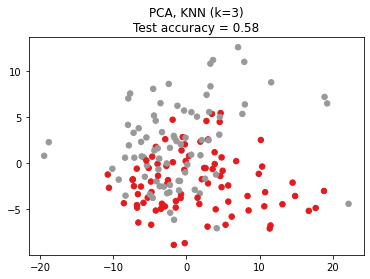

<Figure size 432x288 with 0 Axes>

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

n_neighbors = 3
random_state = 0

# Load Digits dataset

# Split into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size = 0.2, random_state = 0)

dim = 164
n_classes = len(np.unique(y_))

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2))

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(
    StandardScaler(),
    NeighborhoodComponentsAnalysis(n_components=2, random_state=random_state),
)

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Make a list of the methods to be compared
dim_reduction_methods = [("PCA", pca), ("LDA", lda), ("NCA", nca)]

# plt.figure()
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X_)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_, s=30, cmap="Set1")
    plt.title(
        "{}, KNN (k={})\nTest accuracy = {:.2f}".format(name, n_neighbors, acc_knn)
    )
plt.show()

#Data Spliting

In [ ]:
print(list_of_feat)

['p1n1_interval_gap_20ms', 'p1p2_interval_gap_20ms', 'p1n2_interval_gap_20ms', 'p1p3_interval_gap_20ms', 'n1p2_interval_gap_20ms', 'n1n2_interval_gap_20ms', 'n1p3_interval_gap_20ms', 'p2n2_interval_gap_20ms', 'p2p3_interval_gap_20ms', 'n2p3_interval_gap_20ms', 'n0p1_interval_nogap_20ms', 'n0n1_interval_nogap_20ms', 'n0p2_interval_nogap_20ms', 'n0n2_interval_nogap_20ms', 'n0p3_interval_nogap_20ms', 'p1n1_interval_nogap_20ms', 'p1p2_interval_nogap_20ms', 'p1n2_interval_nogap_20ms', 'p1p3_interval_nogap_20ms', 'n1p2_interval_nogap_20ms', 'MeanP_Beta_20ms', 'MedianF_Beta_20ms', 'MeanF_Beta_20ms', 'SpectralEdge_Beta_20ms', 'PeakF_Beta_20ms', 'MeanP_Theta_20ms', 'MedianF_Theta_20ms', 'MeanF_Theta_20ms', 'SpectralEdge_Theta_20ms', 'PeakF_Theta_20ms', 'MeanP_Delta_20ms', 'MedianF_Delta_20ms', 'MeanF_Delta_20ms', 'SpectralEdge_Delta_20ms', 'PeakF_Delta_20ms', 'MeanP_Gamma_20ms', 'TotalEEGPower_20ms', 'RelativeAlpha_20ms', 'RelativeBeta_20ms', 'RelativeTheta_20ms', 'RelativeDelta_20ms', 'DTR_20m

In [ ]:
X_new = dataset[list_of_feat]
y_new = dataset.iloc[:, 1]

In [ ]:
X_new.shape

(165, 5)

In [ ]:
y_new.shape

(165,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)

In [ ]:
result={}



---





---

